In [1]:
# Name: Homework #1 -- ECGR 4105
# Purpose: Feature scaling and regularization
# Author: Tim Johnson, Electrical Engineering Major, UNCC
# Date Created: September 27, 2021

In [2]:
# Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

# Read the csv file that has the dataset
housing = pd.read_csv('/Users/timjj/OneDrive/Desktop/Housing.csv');
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
####################################################################################################################
# CUSTOM FUNCTIONS

In [4]:
####################################################################################################################
####################################################################################################################
# Custom function for calculating cost or loss(J)
def calc_cost(x, y, theta):
    
# calculate h for cost equation
    h = x.dot(theta);
# calculate error for cost equation --> (h - y)
    error = np.subtract(h, y);
# raise error to the 2nd power
    sqrError = np.square(error);
# calculate cost --> J
    J = 1/(2*length) * np.sum(sqrError);

    return J

In [5]:
# Make into binary
bin_vars = ['mainroad','guestroom','basement','airconditioning','hotwaterheating', 'prefarea']

# Defining the map function
def binary_map(x):
    
    return x.map({'yes': 1, "no": 0})

In [6]:
# Custom function for calculating gradient descent (theta_j)
def calc_grad_descent(x, y, theta, alpha, num_iter):
    
# Pre-populate cost history with 0
    cost_history = np.zeros(num_iter)
# write for loop to calculate gradient descent
    for i in range(num_iter):
        h = x.dot(theta);
        error = np.subtract(h, y);
        summation = (alpha/length) * x.transpose().dot(error);
        theta = theta - summation;
        cost_history[i] = calc_cost(x, y, theta);
        
    return theta, cost_history

####################################################################################################################
####################################################################################################################

In [7]:
# Custom function for calculating gradient descent (theta_j) with regularization
def calc_grad_descent_reg(x, y, theta, alpha, lamda, num_iter):
    
# Pre-populate cost history with 0
    cost_history = np.zeros(num_iter)
# write for loop to calculate gradient descent
   # for i in range(num_iter):
    #    h = x.dot(theta);
    #    error = np.subtract(h, y);
     #   summation = (alpha/length) * x.transpose().dot(error);
     #   regularization = 1 - (alpha*lamda)/(length);
      #  theta = theta.dot(regularization) - summation;
       
    for i in range(num_iter):
        h = x.dot(theta)
        error = np.subtract(h, y)
        theta[0]=1
        summation = ((alpha / length) * x.transpose().dot(error))
        theta = [element * (1-((alpha*lamda)/length)) for element in theta] - summation;
        cost_history[i] = calc_cost(x, y, theta);
        #testcosthistory[i]= computecostoutput(TestOutput, TestPrice, theta)
        #costhistory[i] = computecostoutput(Output, Price, theta)
    #return theta, costhistory, testcosthistory 
        
    return theta, cost_history

In [8]:
####################################################################################################################
####################################################################################################################

# PROBLEM 1

In [9]:
######################################################################################
#          PART A

In [10]:
from sklearn.model_selection import train_test_split

# Split dataset into 70% training and 30% evaluation
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 5);
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
122,5950000,6254,4,2,1,yes,no,yes,no,no,1,yes,semi-furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
295,4200000,2325,3,1,2,no,no,no,no,no,0,no,semi-furnished
299,4200000,7000,3,1,1,yes,no,no,no,no,3,no,furnished
524,2380000,3264,2,1,1,yes,no,no,no,no,0,no,unfurnished


In [11]:
# Put I/O into matrices
price = df_train.values[:, 0];
area = df_train.values[:, 1];
bed = df_train.values[:, 2];
bath = df_train.values[:, 3];
stories = df_train.values[:, 4];
parking = df_train.values[:, 10];

# Create vector of ones for index 0
length = len(df_train);
x0 = np.ones((length, 1));

# Make inputs into 2D array 
area = area.reshape(length, 1);
bed = bed.reshape(length, 1);
bath = bath.reshape(length, 1);
stories = stories.reshape(length, 1);
parking = parking.reshape(length, 1);

In [12]:
# Final x matrix
x = np.hstack((x0, area, bed, bath, stories, parking));
# Create vector for parameters
theta1a = np.zeros(6);
x.shape

(381, 6)

In [13]:
cost_train_1a = calc_cost(x, price, theta1a)
print(cost_train_1a)

14026588115362.336


In [14]:
# Define input parameters to function
theta1 = [0., 0., 0., 0., 0., 0.];
num_iter = 1500;
alpha1 = 0.0000000001;

# Call grad_desc function
theta1, cost_history_train = calc_grad_descent(x, price, theta1a, alpha1, num_iter);
print('Value of theta = ', theta1)
print('Cost history = ', cost_history_train)

Value of theta =  [0.19329026649436856 871.8116297471876 0.6274550382250199
 0.30571480688373204 0.43743579502210317 0.16723559948224276]
Cost history =  [1.39487689e+13 1.38714431e+13 1.37946076e+13 ... 1.75369195e+12
 1.75368628e+12 1.75368066e+12]


In [15]:
################## EVALUATION SET
# Put I/O into matrices
price_test = df_test.values[:, 0];
area_test = df_test.values[:, 1];
bed_test = df_test.values[:, 2];
bath_test = df_test.values[:, 3];
stories_test = df_test.values[:, 4];
parking_test = df_test.values[:, 10];

# Create vector of ones for index 0
length = len(df_test);
x0_test = np.ones((length, 1));

# Make inputs into 2D array 
area_test = area_test.reshape(length, 1);
bed_test = bed_test.reshape(length, 1);
bath_test = bath_test.reshape(length, 1);
stories_test = stories_test.reshape(length, 1);
parking_test = parking_test.reshape(length, 1);

In [16]:
# Final x matrix
x_test = np.hstack((x0_test, area_test, bed_test, bath_test, stories_test, parking_test));
# Create vector for parameters
theta1a_test = np.zeros(6);
x_test.shape

(164, 6)

In [17]:
cost_test_1a = calc_cost(x_test, price_test, theta1a_test)
print(cost_test_1a)

10970361870647.867


In [18]:
# Define input parameters to function
theta1_test = [0., 0., 0., 0., 0., 0.];
num_iter = 1500;
alpha1 = 0.0000000001;

# Call grad_desc function
theta1_test, cost_history_test = calc_grad_descent(x_test, price_test, theta1a_test, alpha1, num_iter);
print('Value of theta = ', theta1_test)
print('Cost history = ', cost_history_test)

Value of theta =  [0.1947554028286552 789.0324211449329 0.6193979033426642
 0.28735023132398635 0.42994311209945557 0.13329101851426253]
Cost history =  [1.09131070e+13 1.08561954e+13 1.07996248e+13 ... 1.41928684e+12
 1.41927982e+12 1.41927283e+12]


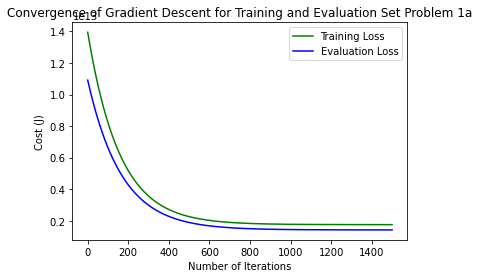

In [19]:
# Plot Gradient Descent for training and testing data
plot.plot(range(1, num_iter + 1), cost_history_train, color ='green', label = "Training Loss")
plot.plot(range(1, num_iter + 1), cost_history_test, color ='blue', label = "Evaluation Loss")
plot.rcParams["figure.figsize"] = (10,6)
plot.xlabel('Number of Iterations')
plot.ylabel('Cost (J)')
plot.title('Convergence of Gradient Descent for Training and Evaluation Set Problem 1a')
plot.legend()
plot.show()

In [20]:
########################################################################
#          PART B

In [21]:
bin_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

housing[bin_vars] = housing[bin_vars].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [22]:
# Split dataset into 70% training and 30% evaluation
df_trainb, df_testb = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 4);
df_trainb.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
286,4235000,2787,3,1,1,1,0,1,0,0,0,1,furnished
477,2940000,4960,2,1,1,1,0,0,0,0,0,0,unfurnished
33,8190000,5960,3,3,2,1,1,1,0,0,1,0,unfurnished
475,2961000,3000,2,1,2,1,0,0,0,0,0,0,semi-furnished
104,6195000,5500,3,2,1,1,1,1,0,0,2,1,furnished


In [23]:
################## TRAINING SET
# Put I/O into matrices
price = df_trainb.values[:, 0];
area = df_trainb.values[:, 1];
bed = df_trainb.values[:, 2];
bath = df_trainb.values[:, 3];
stories = df_trainb.values[:, 4];
mainroad = df_trainb.values[:, 5];
guestroom = df_trainb.values[:, 6];
basement = df_trainb.values[:, 7]
heating = df_trainb.values[:, 8];
ac = df_trainb.values[:, 9];
parking = df_trainb.values[:, 10];

# Create vector of ones for index 0
length = len(df_trainb);
x0 = np.ones((length, 1));

# Make inputs into 2D array 
area = area.reshape(length, 1);
bed = bed.reshape(length, 1);
bath = bath.reshape(length, 1);
stories = stories.reshape(length, 1);
mainroad = mainroad.reshape(length, 1);
guestroom = guestroom.reshape(length, 1);
basement = basement.reshape(length, 1);
heating = heating.reshape(length, 1);
ac = ac.reshape(length, 1);
parking = parking.reshape(length, 1);

In [24]:
# Final x matrix
xb = np.hstack((x0, area, bed, bath, stories, mainroad, guestroom, basement, heating, ac, parking));
# Create vector for parameters
theta1b = np.zeros(11);
xb.shape
print(xb)

[[1.0 2787 3 ... 0 0 0]
 [1.0 4960 2 ... 0 0 0]
 [1.0 5960 3 ... 0 0 1]
 ...
 [1.0 3930 2 ... 0 0 0]
 [1.0 3800 3 ... 0 0 1]
 [1.0 6254 4 ... 0 0 1]]


In [25]:
cost_train_1b = calc_cost(xb, price, theta1b)
print(cost_train_1b)

13361077658436.482


In [26]:
# Define input parameters to function
theta1b = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.];
num_iter = 1500;
alpha1 = 0.0000000001;

# Call grad_desc function
theta1b, cost_history_trainb = calc_grad_descent(xb, price, theta1b, alpha1, num_iter);
print('Value of theta = ', theta1b)
print('Cost history = ', cost_history_trainb)

Value of theta =  [0.1893013053324275 849.7053259311597 0.6118188189526217
 0.29511515139753886 0.43314756229836887 0.17334853219044596
 0.04817284046764981 0.08969807218997133 0.014959439941349822
 0.09602084412304868 0.1608460600001558]
Cost history =  [1.32864606e+13 1.32123190e+13 1.31386498e+13 ... 1.65029910e+12
 1.65029392e+12 1.65028877e+12]


In [27]:
################## EVALUATION SET
# Put I/O into matrices
price_test = df_testb.values[:, 0];
area_test = df_testb.values[:, 1];
bed_test = df_testb.values[:, 2];
bath_test = df_testb.values[:, 3];
stories_test = df_testb.values[:, 4];
mainroad_test = df_testb.values[:, 5];
guestroom_test = df_testb.values[:, 6];
basement_test = df_testb.values[:, 7]
heating_test = df_testb.values[:, 8];
ac_test = df_testb.values[:, 9];
parking_test = df_testb.values[:, 10];

# Create vector of ones for index 0
length = len(df_testb);
x0 = np.ones((length, 1));

# Make inputs into 2D array 
area_test = area_test.reshape(length, 1);
bed_test = bed_test.reshape(length, 1);
bath_test = bath_test.reshape(length, 1);
stories_test = stories_test.reshape(length, 1);
mainroad_test = mainroad_test.reshape(length, 1);
guestroom_test = guestroom_test.reshape(length, 1);
basement_test = basement_test.reshape(length, 1);
heating_test = heating_test.reshape(length, 1);
ac_test = ac_test.reshape(length, 1);
parking_test = parking_test.reshape(length, 1);

In [28]:
# Final x matrix
x_testb = np.hstack((x0_test, area_test, bed_test, bath_test, stories_test, mainroad_test, guestroom_test, basement_test, heating_test, ac_test, parking_test));
# Create vector for parameters
theta1b_test = np.zeros(11);
x_testb.shape

(164, 11)

In [29]:
cost_test_1b = calc_cost(x_testb, price_test, theta1b_test)
print(cost_test_1b)

12516456285823.172


In [30]:
# Define input parameters to function
theta1b_test = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.];
num_iter = 1500;
alpha1 = 0.0000000001;

# Call grad_desc function
theta1b_test, cost_history_testb = calc_grad_descent(x_testb, price_test, theta1b_test, alpha1, num_iter);
print('Value of theta = ', theta1b_test)
print('Cost history = ', cost_history_testb)

Value of theta =  [0.20420438898109508 843.0652462404387 0.6585451899567897
 0.3136408014541138 0.443294954508677 0.17305366402089142
 0.05441503096265201 0.08398125469300526 0.014436010765921594
 0.10072731537026296 0.16044710995198108]
Cost history =  [1.24525717e+13 1.23890653e+13 1.23259351e+13 ... 1.73021218e+12
 1.73020344e+12 1.73019476e+12]


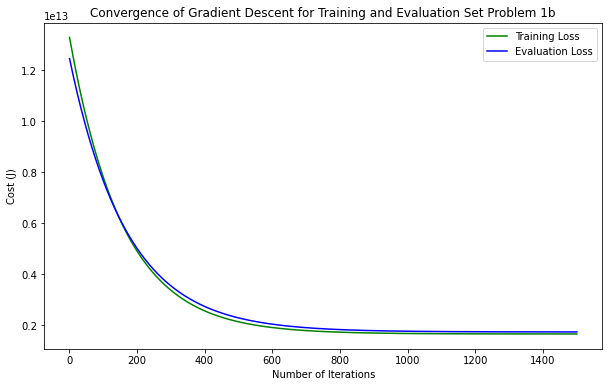

In [31]:
# Plot Gradient Descent for training and testing data
plot.plot(range(1, num_iter + 1), cost_history_trainb, color ='green', label = "Training Loss")
plot.plot(range(1, num_iter + 1), cost_history_testb, color ='blue', label = "Evaluation Loss")
plot.rcParams["figure.figsize"] = (10,6)
plot.xlabel('Number of Iterations')
plot.ylabel('Cost (J)')
plot.title('Convergence of Gradient Descent for Training and Evaluation Set Problem 1b')
plot.legend()
plot.show()

In [32]:
####################################################################################################################
####################################################################################################################

# PROBLEM 2

In [33]:
########################################################################
#          PART A

In [34]:
# NORMALIZATION FOR PART A

In [35]:
# Split dataset into 70% training and 30% evaluation
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 2);
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
166,7800,3,1,1,2,5320000
378,2275,3,1,3,0,3640000
349,4820,3,1,2,0,3780000
368,5640,2,1,1,0,3675000
306,4840,3,1,2,1,4165000


In [36]:
####################### TRAINING SET
import warnings
warnings.filterwarnings('ignore')
# Scale new training set to make more uniform
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# define standard scaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(5)

,area,bedrooms,bathrooms,stories,parking,price
166,0.440860,0.4,0.0,0.000000,0.666667,0.309091
378,0.044803,0.4,0.0,0.666667,0.000000,0.163636
349,0.227240,0.4,0.0,0.333333,0.000000,0.175758
368,0.286022,0.2,0.0,0.000000,0.000000,0.166667
306,0.228674,0.4,0.0,0.333333,0.333333,0.209091


In [37]:
# Split new training set into I/O
y_Newtrain = df_Newtrain.pop('price')
x_Newtrain = df_Newtrain

length = len(df_Newtrain);
# Create vector X_0 full of ones (will always be 1)
x0 = np.ones((length, 1));
x = np.hstack((x0, x_Newtrain));
y = y_Newtrain.values
# Create vector for parameters
theta2 = np.zeros(6);

In [38]:
cost_train_2a = calc_cost(x, y, theta2)
print(cost_train_2a)

0.046342252923604936


In [39]:
# Define input parameters to function
theta2 = [0., 0., 0., 0., 0., 0.];
num_iter = 1500;
alpha2 = 0.01;

# Call grad_desc function
theta2, cost_history_train2 = calc_grad_descent(x, y, theta2, alpha2, num_iter);
print('Value of theta = ', theta2)
print('Cost history = ', cost_history_train2)

Value of theta =  [0.11046561 0.14962971 0.07979829 0.14556768 0.12722271 0.12273552]
Cost history =  [0.04532578 0.04433714 0.04337557 ... 0.00659141 0.00659079 0.00659018]


In [40]:
####################### Evaluation Set
import warnings
warnings.filterwarnings('ignore')
# Scale new eval set to make more uniform
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
df_Newtest.head(5)

,area,bedrooms,bathrooms,stories,parking,price
333,0.089655,0.25,0.0,0.333333,0.000000,0.206667
84,0.142069,0.25,0.0,0.333333,0.666667,0.453333
439,0.153793,0.00,0.0,0.000000,0.000000,0.143333
396,0.133793,0.00,0.0,0.000000,0.333333,0.166667
161,0.303448,0.25,0.0,0.666667,0.000000,0.353333


In [41]:
# Split new evaluation set into I/O
y_Newtest = df_Newtest.pop('price')
x_Newtest = df_Newtest

length = len(df_Newtest);
# Create vector X_0 full of ones (will always be 1)
x0 = np.ones((length, 1));
x = np.hstack((x0, x_Newtest));
y = y_Newtest.values
# Create vector for parameters
theta2_test = np.zeros(6);

In [42]:
cost_test_2a = calc_cost(x, y, theta2_test)
print(cost_test_2a)

0.05951689430894311


In [43]:
theta2_test = [0., 0., 0., 0., 0., 0.];
num_iter = 1500;
alpha2 = 0.01;

# Call grad_desc function
theta2_test, cost_history_test2a = calc_grad_descent(x, y, theta2_test, alpha2, num_iter);
print('Value of theta = ', theta2_test)
print('Cost history = ', cost_history_test2a)

Value of theta =  [0.1346316  0.16721226 0.12400255 0.15709828 0.16049997 0.14269331]
Cost history =  [0.05832254 0.05715818 0.05602306 ... 0.00824034 0.00823941 0.00823849]


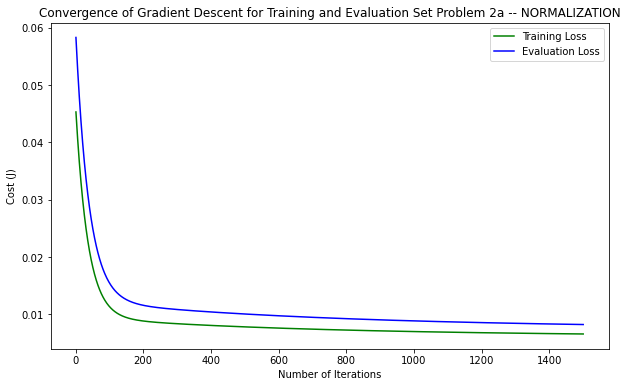

In [44]:
# Plot Gradient Descent 
plot.plot(range(1, num_iter + 1), cost_history_train2, color ='green', label = "Training Loss")
plot.plot(range(1, num_iter + 1), cost_history_test2a, color ='blue', label = "Evaluation Loss")
plot.rcParams["figure.figsize"] = (10,6)
plot.xlabel('Number of Iterations')
plot.ylabel('Cost (J)')
plot.title('Convergence of Gradient Descent for Training and Evaluation Set Problem 2a -- NORMALIZATION')
plot.legend()
plot.show()

In [45]:
# STANDARDIZATION FOR PART A

In [46]:
# Split dataset into 70% training and 30% evaluation
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 7);
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
235,5680,3,1,2,1,4620000
384,4500,2,1,1,0,3570000
41,6360,3,2,4,0,7840000
328,4500,3,2,2,0,3990000
330,4050,2,1,2,0,3990000


In [47]:
scaler = StandardScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(5)

,area,bedrooms,bathrooms,stories,parking,price
235,0.225539,0.003632,-0.573002,0.208748,0.329057,-0.082299
384,-0.306135,-1.380058,-0.573002,-0.927437,-0.800409,-0.669718
41,0.531927,0.003632,1.342031,2.481118,-0.800409,1.719116
328,-0.306135,0.003632,1.342031,0.208748,-0.800409,-0.434750
330,-0.508893,-1.380058,-0.573002,0.208748,-0.800409,-0.434750


In [48]:
# Split new training set into I/O
y_Newtrain = df_Newtrain.pop('price')
x_Newtrain = df_Newtrain

length = len(df_Newtrain);
# Create vector X_0 full of ones (will always be 1)
x0 = np.ones((length, 1));
x = np.hstack((x0, x_Newtrain));
y = y_Newtrain.values
# Create vector for parameters
theta2 = np.zeros(6);

In [49]:
cost_train_2a_st = calc_cost(x, y, theta2)
print(cost_train_2a_st)

0.5000000000000001


In [50]:
# Define input parameters to function
theta2 = [0., 0., 0., 0., 0., 0.];
num_iter = 1500;
alpha2 = 0.01;

# Call grad_desc function
theta2, cost_history_train2_st = calc_grad_descent(x, y, theta2, alpha2, num_iter);
print('Value of theta = ', theta2)
print('Cost history = ', cost_history_train2_st)

Value of theta =  [-5.35587905e-17  4.27009101e-01  7.79212918e-02  3.21525374e-01
  2.25395230e-01  1.27066578e-01]
Cost history =  [0.48979778 0.47997164 0.47050749 ... 0.21128348 0.21128348 0.21128348]


In [51]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
scaler = StandardScaler()
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
df_Newtest.head(5)

,area,bedrooms,bathrooms,stories,parking,price
542,-0.716464,-1.163430,-0.568815,-0.935729,-0.823492,-1.474716
70,-0.530421,0.143437,1.652273,0.263174,-0.823492,0.989788
504,-0.929434,-1.163430,-0.568815,-0.935729,-0.823492,-1.033159
221,-0.814381,1.450303,1.652273,0.263174,-0.823492,0.000564
519,-0.119169,-1.163430,-0.568815,0.263174,-0.823492,-1.132423


In [52]:
# Split new training set into I/O
y_Newtest = df_Newtest.pop('price')
x_Newtest = df_Newtest

length = len(df_Newtest);
# Create vector X_0 full of ones (will always be 1)
x0 = np.ones((length, 1));
x = np.hstack((x0, x_Newtest));
y = y_Newtest.values
# Create vector for parameters
theta2 = np.zeros(6);

In [53]:
cost_test_2a_st = calc_cost(x, y, theta2)
print(cost_test_2a_st)

0.5


In [54]:
# Define input parameters to function
theta2 = [0., 0., 0., 0., 0., 0.];
num_iter = 1500;
alpha2 = 0.01;

# Call grad_desc function
theta2, cost_history_test2_st = calc_grad_descent(x, y, theta2, alpha2, num_iter);
print('Value of theta = ', theta2)
print('Cost history = ', cost_history_test2_st)

Value of theta =  [2.57774831e-16 2.95338849e-01 2.10656902e-02 3.12861292e-01
 3.05838669e-01 2.73635162e-01]
Cost history =  [0.48976826 0.47991752 0.4704334  ... 0.21398592 0.21398592 0.21398592]


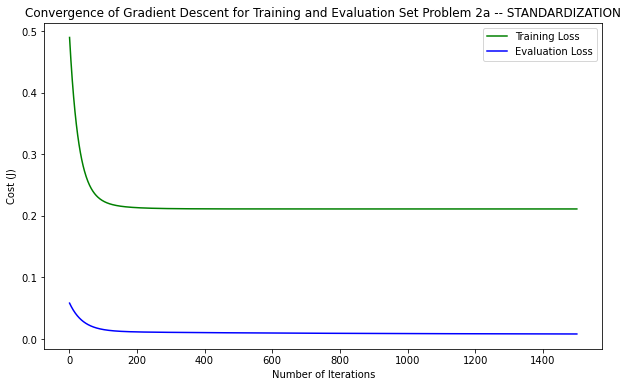

In [55]:
# Plot Gradient Descent 
plot.plot(range(1, num_iter + 1), cost_history_train2_st, color ='green', label = "Training Loss")
plot.plot(range(1, num_iter + 1), cost_history_test2a, color ='blue', label = "Evaluation Loss")
plot.rcParams["figure.figsize"] = (10,6)
plot.xlabel('Number of Iterations')
plot.ylabel('Cost (J)')
plot.title('Convergence of Gradient Descent for Training and Evaluation Set Problem 2a -- STANDARDIZATION')
plot.legend()
plot.show()

In [56]:
########################################################################
#          PART B

In [57]:
# NORMALIZATION FOR PART B

In [58]:
# Split dataset into 70% training and 30% evaluation
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 4);
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
286,4235000,2787,3,1,1,1,0,1,0,0,0,1,furnished
477,2940000,4960,2,1,1,1,0,0,0,0,0,0,unfurnished
33,8190000,5960,3,3,2,1,1,1,0,0,1,0,unfurnished
475,2961000,3000,2,1,2,1,0,0,0,0,0,0,semi-furnished
104,6195000,5500,3,2,1,1,1,1,0,0,2,1,furnished


In [59]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'parking','price']
Newtrain = df_train[num_vars]
Newtest = df_test[num_vars]
Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,parking,price
286,2787,3,1,1,1,0,1,0,0,1,0,4235000
477,4960,2,1,1,1,0,0,0,0,0,0,2940000
33,5960,3,3,2,1,1,1,0,0,0,1,8190000
475,3000,2,1,2,1,0,0,0,0,0,0,2961000
104,5500,3,2,1,1,1,1,0,0,1,2,6195000


In [60]:
import warnings
warnings.filterwarnings('ignore')
# define standard scaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
Newtrain[num_vars] = scaler.fit_transform(Newtrain[num_vars])
Newtrain.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,parking,price
286,0.066207,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.215152
477,0.217488,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.103030
33,0.287107,0.4,0.666667,0.333333,1.0,1.0,1.0,0.0,0.0,0.0,0.333333,0.557576
475,0.081036,0.2,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.104848
104,0.255082,0.4,0.333333,0.000000,1.0,1.0,1.0,0.0,0.0,1.0,0.666667,0.384848


In [61]:
# Split new training set into I/O
y_Newtrain = Newtrain.pop('price')
x_Newtrain = Newtrain

length = len(df_Newtrain);
# Create vector X_0 full of ones (will always be 1)
x0 = np.ones((length, 1));
x = np.hstack((x0, x_Newtrain));
y = y_Newtrain.values
# Create vector for parameters
theta2b = np.zeros(12);


In [62]:
cost_train_2b = calc_cost(x, y, theta2b)
print(cost_train_2b)

0.048569050727460726


In [63]:
# Define input parameters to function
theta2b = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.];
num_iter = 1500;
alpha2 = 0.01;

# Call grad_desc function
theta2b, cost_history_train2b = calc_grad_descent(x, y, theta2b, alpha2, num_iter);
print('Value of theta = ', theta2b)
print('Cost history = ', cost_history_train2b)

Value of theta =  [0.03853321 0.10680617 0.07009388 0.10880756 0.12625162 0.05357144
 0.0363738  0.03293298 0.03813387 0.08812259 0.06196741 0.10024062]
Cost history =  [0.04656519 0.04466129 0.04285234 ... 0.0051972  0.00519664 0.00519607]


In [64]:
####################### Evaluation Set
import warnings
warnings.filterwarnings('ignore')
# Scale new eval set to make more uniform
Newtest[num_vars] = scaler.fit_transform(Newtest[num_vars])
Newtest.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,parking,price
489,0.142857,0.50,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.103679
302,0.042857,0.50,0.0,0.666667,1.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.234114
66,1.000000,0.25,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.333333,0.494983
270,0.246753,0.50,0.5,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.247492
515,0.135065,0.50,0.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.066890


In [65]:
# Split new evaluation set into I/O
y_Newtest = Newtest.pop('price')
x_Newtest = Newtest

length = len(Newtest);
# Create vector X_0 full of ones (will always be 1)
x0 = np.ones((length, 1));
x = np.hstack((x0, x_Newtest));
y = y_Newtest.values
# Create vector for parameters
theta2_test = np.zeros(12);

In [66]:
cost_test_2b = calc_cost(x, y, theta2_test)
print(cost_test_2b)

0.05361411594130148


In [67]:
theta2_test = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.];
num_iter = 1500;
alpha2 = 0.01;

# Call grad_desc function
theta2_test, cost_history_test2b = calc_grad_descent(x, y, theta2_test, alpha2, num_iter);
print('Value of theta = ', theta2_test)
print('Cost history = ', cost_history_test2b)

Value of theta =  [0.04189303 0.10820035 0.05825242 0.14815223 0.06475467 0.05559656
 0.04610921 0.02166962 0.06069887 0.11671053 0.0833319  0.08521737]
Cost history =  [0.0513155  0.04913446 0.04706496 ... 0.00508938 0.00508892 0.00508845]


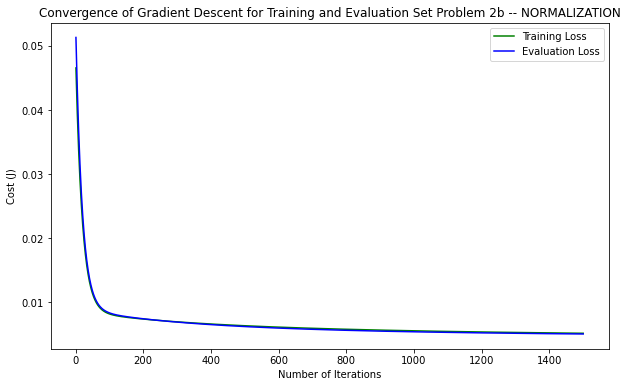

In [68]:
# Plot Gradient Descent 
plot.plot(range(1, num_iter + 1), cost_history_train2b, color ='green', label = "Training Loss")
plot.plot(range(1, num_iter + 1), cost_history_test2b, color ='blue', label = "Evaluation Loss")
plot.rcParams["figure.figsize"] = (10,6)
plot.xlabel('Number of Iterations')
plot.ylabel('Cost (J)')
plot.title('Convergence of Gradient Descent for Training and Evaluation Set Problem 2b -- NORMALIZATION')
plot.legend()
plot.show()

In [69]:
# STANDARDIZATION FOR PART B

In [70]:
# Split dataset into 70% training and 30% evaluation
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 12);
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
471,3010000,3750,3,1,2,1,0,0,0,0,0,0,unfurnished
285,4235000,6650,3,1,2,1,1,0,0,0,0,0,semi-furnished
262,4445000,3750,2,1,1,1,1,1,0,0,0,0,semi-furnished
62,7070000,6240,4,2,2,1,0,0,0,1,1,0,furnished
464,3080000,4500,2,1,2,1,0,0,1,0,1,0,semi-furnished


In [71]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'parking','price']
Newtrain = df_train[num_vars]
Newtest = df_test[num_vars]
Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,parking,price
471,3750,3,1,2,1,0,0,0,0,0,0,3010000
285,6650,3,1,2,1,1,0,0,0,0,0,4235000
262,3750,2,1,1,1,1,1,0,0,0,0,4445000
62,6240,4,2,2,1,0,0,0,1,0,1,7070000
464,4500,2,1,2,1,0,0,1,0,0,1,3080000


In [72]:
import warnings
warnings.filterwarnings('ignore')
# define standard scaler
scaler = StandardScaler()
Newtrain[num_vars] = scaler.fit_transform(Newtrain[num_vars])
Newtrain.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,parking,price
471,-0.650774,0.047748,-0.571834,0.243545,0.401977,-0.490961,-0.757879,-0.229099,-0.657519,-0.543984,-0.807484,-0.993179
285,0.673666,0.047748,-0.571834,0.243545,0.401977,2.036823,-0.757879,-0.229099,-0.657519,-0.543984,-0.807484,-0.288547
262,-0.650774,-1.351645,-0.571834,-0.916338,0.401977,2.036823,1.319472,-0.229099,-0.657519,-0.543984,-0.807484,-0.167753
62,0.486418,1.447141,1.543397,0.243545,0.401977,-0.490961,-0.757879,-0.229099,1.520869,-0.543984,0.353465,1.342172
464,-0.308246,-1.351645,-0.571834,0.243545,0.401977,-0.490961,-0.757879,4.364932,-0.657519,-0.543984,0.353465,-0.952914


In [73]:
# Split new training set into I/O
y_Newtrain = Newtrain.pop('price')
x_Newtrain = Newtrain

length = len(df_Newtrain);
# Create vector X_0 full of ones (will always be 1)
x0 = np.ones((length, 1));
x = np.hstack((x0, x_Newtrain));
y = y_Newtrain.values
# Create vector for parameters
theta2 = np.zeros(12);

In [74]:
cost_train_2b_st = calc_cost(x, y, theta2)
print(cost_train_2b_st)

0.5


In [75]:
# Define input parameters to function
theta2 = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.];
num_iter = 1500;
alpha2 = 0.01;

# Call grad_desc function
theta2, cost_history_train2b_st = calc_grad_descent(x, y, theta2, alpha2, num_iter);
print('Value of theta = ', theta2)
print('Cost history = ', cost_history_train2b_st)

Value of theta =  [-1.19612690e-16  2.68835247e-01  6.90341026e-02  2.08360960e-01
  2.55625910e-01  8.20942630e-02  1.21162861e-01  8.52487058e-02
  1.21337550e-01  2.15760357e-01  1.31398930e-01  1.37389226e-01]
Cost history =  [0.4859766  0.4725827  0.45978977 ... 0.17973144 0.17973144 0.17973144]


In [76]:
################################ EVALUATION SET
import warnings
warnings.filterwarnings('ignore')
# define standard scaler
scaler = StandardScaler()
Newtest[num_vars] = scaler.fit_transform(Newtest[num_vars])
Newtest.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,parking,price
298,0.333652,0.046441,-0.574629,-0.960466,0.414039,-0.403882,-0.681385,5.131601,-0.729870,-0.577350,1.525360,-0.297596
372,-0.904311,0.046441,-0.574629,0.180957,-2.415229,-0.403882,1.467599,-0.194871,-0.729870,-0.577350,-0.801701,-0.559368
14,1.278661,0.046441,1.203469,0.180957,0.414039,-0.403882,-0.681385,-0.194871,-0.729870,1.732051,-0.801701,2.058354
168,-0.394006,1.315815,-0.574629,0.180957,0.414039,-0.403882,1.467599,-0.194871,1.370107,-0.577350,-0.801701,0.193227
200,-0.271154,0.046441,-0.574629,0.180957,0.414039,-0.403882,1.467599,-0.194871,1.370107,-0.577350,-0.801701,0.029620


In [77]:
# Split new training set into I/O
y_Newtest = Newtest.pop('price')
x_Newtest = Newtest

length = len(Newtest);
# Create vector X_0 full of ones (will always be 1)
x0 = np.ones((length, 1));
x = np.hstack((x0, x_Newtest));
y = y_Newtest.values
# Create vector for parameters
theta2 = np.zeros(12);

In [78]:
cost_test_2b_st = calc_cost(x, y, theta2)
print(cost_test_2b_st)

0.5


In [79]:
# Define input parameters to function
theta2 = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.];
num_iter = 1500;
alpha2 = 0.01;

# Call grad_desc function
theta2, cost_history_test2b_st = calc_grad_descent(x, y, theta2, alpha2, num_iter);
print('Value of theta = ', theta2)
print('Cost history = ', cost_history_test2b_st)

Value of theta =  [-1.81179597e-16  3.22127031e-01 -6.99793381e-03  3.58260045e-01
  1.29549969e-01  1.05980038e-01 -7.86873725e-03  1.27975937e-01
  5.42615956e-02  2.12906970e-01  2.03795671e-01  1.46406102e-01]
Cost history =  [0.48208573 0.46504603 0.4488375  ... 0.11384815 0.11384814 0.11384814]


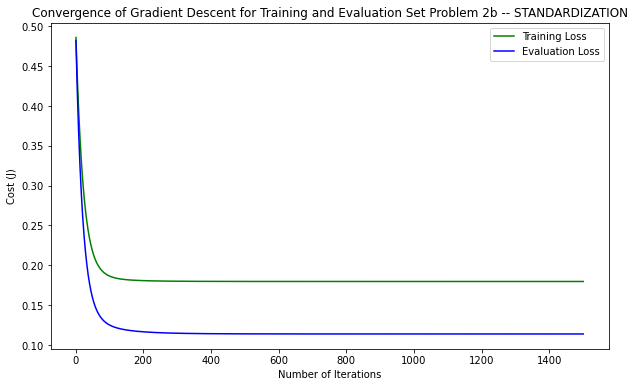

In [80]:
# Plot Gradient Descent 
plot.plot(range(1, num_iter + 1), cost_history_train2b_st, color ='green', label = "Training Loss")
plot.plot(range(1, num_iter + 1), cost_history_test2b_st, color ='blue', label = "Evaluation Loss")
plot.rcParams["figure.figsize"] = (10,6)
plot.xlabel('Number of Iterations')
plot.ylabel('Cost (J)')
plot.title('Convergence of Gradient Descent for Training and Evaluation Set Problem 2b -- STANDARDIZATION')
plot.legend()
plot.show()

In [81]:
####################################################################################################################
####################################################################################################################

# PROBLEM 3

In [82]:
########################################################################
#          PART A

In [83]:
# Split dataset into 70% training and 30% evaluation
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 1);
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
180,5215000,4500,4,2,1,0,0,1,0,1,2,0,semi-furnished
189,5040000,3540,2,1,1,0,1,1,0,0,0,0,semi-furnished
93,6300000,7200,3,2,1,1,0,1,0,1,3,0,semi-furnished
444,3220000,3120,3,1,2,0,0,0,0,0,0,0,furnished
81,6615000,4000,3,2,2,1,0,1,0,1,1,0,semi-furnished


In [84]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
Newtrain = df_train[num_vars]
Newtest = df_test[num_vars]
Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
180,4500,4,2,1,2,5215000
189,3540,2,1,1,0,5040000
93,7200,3,2,1,3,6300000
444,3120,3,1,2,0,3220000
81,4000,3,2,2,1,6615000


In [85]:
import warnings
warnings.filterwarnings('ignore')
# define standard scaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
Newtrain[num_vars] = scaler.fit_transform(Newtrain[num_vars])
Newtrain.head(5)

,area,bedrooms,bathrooms,stories,parking,price
180,0.193103,0.6,0.333333,0.000000,0.666667,0.330000
189,0.126897,0.2,0.000000,0.000000,0.000000,0.313333
93,0.379310,0.4,0.333333,0.000000,1.000000,0.433333
444,0.097931,0.4,0.000000,0.333333,0.000000,0.140000
81,0.158621,0.4,0.333333,0.333333,0.333333,0.463333


In [86]:
# Split new training set into I/O
y_Newtrain = Newtrain.pop('price')
x_Newtrain = Newtrain

length = len(Newtrain);
# Create vector X_0 full of ones (will always be 1)
x0 = np.ones((length, 1));
x = np.hstack((x0, x_Newtrain));
y = y_Newtrain.values
# Create vector for parameters
theta3a = np.zeros(6);

In [87]:
cost_train_3a = calc_cost(x, y, theta3a)
print(cost_train_3a)

0.05621225129273842


In [88]:
# Define input parameters to function
theta3a = [0., 0., 0., 0., 0., 0.];
num_iter = 1500;
lamda = 5;
alpha3 = 0.07;

# Call grad_desc function
theta3a, cost_history_train3a = calc_grad_descent_reg(x, y, theta3a, alpha3, lamda, num_iter);
print('Value of theta = ', theta3a)
print('Cost history = ', cost_history_train3a)

Value of theta =  [ 0.98979907 -0.44470106 -1.26976052  0.39864248  0.01194007  0.01308518]
Cost history =  [0.28764221 0.22679655 0.22217092 ... 0.05363621 0.05363564 0.05363508]


In [89]:
####################### EVALUATION SET
import warnings
warnings.filterwarnings('ignore')
# define standard scaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
Newtest[num_vars] = scaler.fit_transform(Newtest[num_vars])
Newtest.head(5)

,area,bedrooms,bathrooms,stories,parking,price
62,0.397403,0.666667,0.5,0.333333,0.333333,0.460606
247,0.584416,0.666667,0.0,1.000000,1.000000,0.242424
142,0.766234,0.666667,0.5,0.333333,0.333333,0.333333
107,0.412987,0.333333,0.0,0.666667,0.000000,0.378788
483,0.429870,0.333333,0.0,0.333333,0.000000,0.103030


In [90]:
# Split new training set into I/O
y_Newtest = Newtest.pop('price')
x_Newtest = Newtest

length = len(Newtest);
# Create vector X_0 full of ones (will always be 1)
x0 = np.ones((length, 1));
x = np.hstack((x0, x_Newtest));
y = y_Newtest.values
# Create vector for parameters
theta3a = np.zeros(6);

In [91]:
cost_test_3a = calc_cost(x, y, theta3a)
print(cost_test_3a)

0.048922318808931886


In [92]:
# Define input parameters to function
theta3a = [0., 0., 0., 0., 0., 0.];
num_iter = 1500;
lamda = 8;
alpha3 = 0.09;

# Call grad_desc function
theta3a, cost_history_test3a = calc_grad_descent_reg(x, y, theta3a, alpha3, lamda, num_iter);
print('Value of theta = ', theta3a)
print('Cost history = ', cost_history_test3a)

Value of theta =  [ 0.97167513 -0.6357086  -0.54448931  0.07894835 -0.20884903 -0.21857041]
Cost history =  [0.31042626 0.23122347 0.22810401 ... 0.10403186 0.10403186 0.10403186]


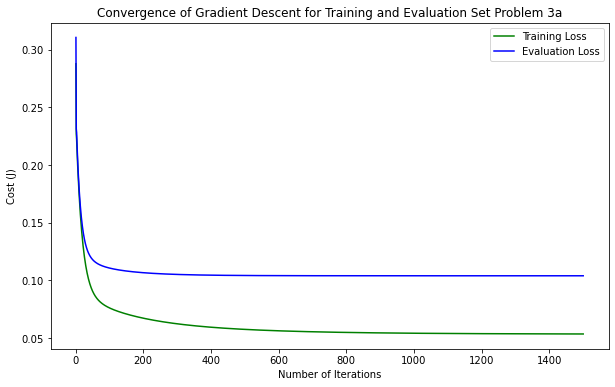

In [93]:
# Plot Gradient Descent 
plot.plot(range(1, num_iter + 1), cost_history_train3a, color ='green', label = "Training Loss")
plot.plot(range(1, num_iter + 1), cost_history_test3a, color ='blue', label = "Evaluation Loss")
plot.rcParams["figure.figsize"] = (10,6)
plot.xlabel('Number of Iterations')
plot.ylabel('Cost (J)')
plot.title('Convergence of Gradient Descent for Training and Evaluation Set Problem 3a')
plot.legend()
plot.show()

In [94]:
########################################################################
#          PART B

In [95]:
# Split dataset into 70% training and 30% evaluation
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 4);
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
286,4235000,2787,3,1,1,1,0,1,0,0,0,1,furnished
477,2940000,4960,2,1,1,1,0,0,0,0,0,0,unfurnished
33,8190000,5960,3,3,2,1,1,1,0,0,1,0,unfurnished
475,2961000,3000,2,1,2,1,0,0,0,0,0,0,semi-furnished
104,6195000,5500,3,2,1,1,1,1,0,0,2,1,furnished


In [96]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'parking','price']
Newtrain = df_train[num_vars]
Newtest = df_test[num_vars]
Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,parking,price
286,2787,3,1,1,1,0,1,0,0,1,0,4235000
477,4960,2,1,1,1,0,0,0,0,0,0,2940000
33,5960,3,3,2,1,1,1,0,0,0,1,8190000
475,3000,2,1,2,1,0,0,0,0,0,0,2961000
104,5500,3,2,1,1,1,1,0,0,1,2,6195000


In [97]:
import warnings
warnings.filterwarnings('ignore')
# define standard scaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
Newtrain[num_vars] = scaler.fit_transform(Newtrain[num_vars])
Newtrain.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,parking,price
286,0.066207,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.215152
477,0.217488,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.103030
33,0.287107,0.4,0.666667,0.333333,1.0,1.0,1.0,0.0,0.0,0.0,0.333333,0.557576
475,0.081036,0.2,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.104848
104,0.255082,0.4,0.333333,0.000000,1.0,1.0,1.0,0.0,0.0,1.0,0.666667,0.384848


In [98]:
# Split new training set into I/O
y_Newtrain = Newtrain.pop('price')
x_Newtrain = Newtrain

length = len(Newtrain);
# Create vector X_0 full of ones (will always be 1)
x0 = np.ones((length, 1));
x = np.hstack((x0, x_Newtrain));
y = y_Newtrain.values
# Create vector for parameters
theta3b = np.zeros(12);

In [99]:
cost_train_3b = calc_cost(x, y, theta3b)
print(cost_train_3b)

0.048569050727460726


In [100]:
# Define input parameters to function
theta3b = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.];
num_iter = 1500;
lamda = 5;
alpha3 = 0.01;

# Call grad_desc function
theta3b, cost_history_train3b = calc_grad_descent_reg(x, y, theta3b, alpha3, lamda, num_iter);
print('Value of theta = ', theta3b)
print('Cost history = ', cost_history_train3b)

Value of theta =  [ 0.99890618 -0.10384305 -0.45080542  0.08665753  0.01986321 -0.55025101
  0.0512906  -0.06022658 -0.01534853  0.03480537  0.07315606  0.05353671]
Cost history =  [0.2887082  0.27445599 0.26808216 ... 0.04619757 0.04619368 0.04618979]


In [101]:
####################### EVALUATION SET
import warnings
warnings.filterwarnings('ignore')
# define standard scaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
Newtest[num_vars] = scaler.fit_transform(Newtest[num_vars])
Newtest.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,parking,price
489,0.142857,0.50,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.103679
302,0.042857,0.50,0.0,0.666667,1.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.234114
66,1.000000,0.25,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.333333,0.494983
270,0.246753,0.50,0.5,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.247492
515,0.135065,0.50,0.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.066890


In [102]:
# Split new training set into I/O
y_Newtest = Newtest.pop('price')
x_Newtest = Newtest

length = len(Newtest);
# Create vector X_0 full of ones (will always be 1)
x0 = np.ones((length, 1));
x = np.hstack((x0, x_Newtest));
y = y_Newtest.values
# Create vector for parameters
theta3b = np.zeros(12);

In [103]:
cost_test_3b = calc_cost(x, y, theta3b)
print(cost_test_3b)

0.05361411594130148


In [104]:
# Define input parameters to function
theta3b = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.];
num_iter = 1500;
lamda = 5;
alpha3 = 0.01;

# Call grad_desc function
theta3b, cost_history_test3b = calc_grad_descent_reg(x, y, theta3b, alpha3, lamda, num_iter);
print('Value of theta = ', theta3b)
print('Cost history = ', cost_history_test3b)

Value of theta =  [ 0.99871758 -0.08653161 -0.49621958  0.13398515 -0.11818146 -0.42002508
  0.03327889 -0.1503365  -0.01813073  0.12959503  0.11660113 -0.00951599]
Cost history =  [0.27942261 0.26531718 0.25896121 ... 0.0422183  0.04221458 0.04221087]


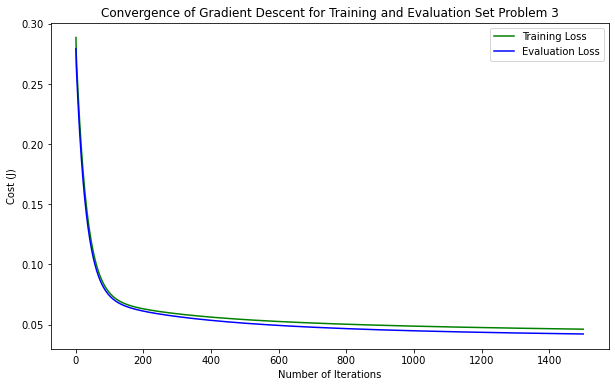

In [105]:
# Plot Gradient Descent 
plot.plot(range(1, num_iter + 1), cost_history_train3b, color ='green', label = "Training Loss")
plot.plot(range(1, num_iter + 1), cost_history_test3b, color ='blue', label = "Evaluation Loss")
plot.rcParams["figure.figsize"] = (10,6)
plot.xlabel('Number of Iterations')
plot.ylabel('Cost (J)')
plot.title('Convergence of Gradient Descent for Training and Evaluation Set Problem 3')
plot.legend()
plot.show()